In [1]:
import json
import sys
import copy

In [2]:
business_file = open('yelp_dataset/yelp_academic_dataset_business.json')

categories = ['Beauty & Spas','Shopping','Bars']
categories_list = categories.copy()
categories = set(categories)
filtered_business = {}
filtered_business_categories = {}

for line in business_file:
    business = json.loads(line)
    if business['city'] == 'Toronto' and int(business['review_count']) >= 10:
        business_categories = business['categories']
        filtered_business_categories[business['business_id']] = business['categories']
        if business_categories is not None:
            business_categories = business_categories.split(',')
            business_categories = set(business_categories)
            if len(categories.intersection(business_categories)) > 0:
                common_elements = categories.intersection(business_categories)
                common_elements = list(common_elements)
                if categories_list[0] in common_elements:
                    filtered_business[business['business_id']] = categories_list[0]
                elif categories_list[1] in common_elements:
                    filtered_business[business['business_id']] = categories_list[1]
                elif categories_list[2] in common_elements:
                    filtered_business[business['business_id']] = categories_list[2]
print(len(filtered_business))
business_file.close()

749


In [3]:
reviews_file = open('yelp_dataset/yelp_academic_dataset_review.json')
reviews = {}
for line in reviews_file:
    review = json.loads(line)
    if review['business_id'] in filtered_business.keys():
        value = reviews.get(review['business_id'])
        if value is None :
            reviews[review['business_id']] = review['text']
        else:
            reviews[review['business_id']] += ' ' + review['text']
reviews_file.close()

In [4]:
reviews_list = []
for key, value in reviews.items():
    temp = [key,value,filtered_business[key]]
    reviews_list.append(temp)
print(len(reviews_list))

749


In [5]:
review_ids,corpus,target = zip(*reviews_list)

In [6]:
import sklearn.feature_extraction.text as sk_text

In [7]:
vectorizer = sk_text.TfidfVectorizer(min_df=1,stop_words = 'english',max_features=1000) #min_df = 0.05
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(X.get_shape)

[[0.00658072 0.02450147 0.00404368 ... 0.         0.00560579 0.01470713]
 [0.         0.         0.         ... 0.         0.00651807 0.00855028]
 [0.00494784 0.01210582 0.01135053 ... 0.00129321 0.         0.        ]
 ...
 [0.02787523 0.01482652 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.03989281 ... 0.         0.         0.        ]]
<bound method spmatrix.get_shape of <749x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 282220 stored elements in Compressed Sparse Row format>>


In [8]:
#print (vectorizer.get_feature_names())

Παίρνω το index των σημείων που ανήκουν στο αντίστοιχο cluster

In [9]:
import sklearn.cluster as sk_cluster

In [10]:
def categories_statistics(predictions,reviews_list,filtered_business_categories):
    idxArray = np.where(predictions == 2)
    for index in idxArray:
        #business_id = reviews_list[idxArray[0][1]][0]
        business_id = reviews_list[index][0]
        print(filtered_business_categories[business_id])
#print(reviews_list[idxArray[0][1]][1])
#print(np.where(predictions == 2))

In [17]:
from sklearn import metrics
import numpy as np
import scipy.spatial.distance as sp_dist

In [19]:
def scores(true_labels,mapped_kmeans_labels):    
    p = metrics.precision_score(true_labels,mapped_kmeans_labels, average=None)
    print(p)
    r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = None)
    print(r)
    p = metrics.precision_score(true_labels,mapped_kmeans_labels, average='weighted')
    print(p)
    r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
    print(r)

In [20]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

In [22]:
def center_distances(kmeans):
    D = sp_dist.pdist(kmeans.cluster_centers_, 'euclidean') 
    print(D)
    distances_array = sp_dist.squareform(D)
    print(sp_dist.squareform(D))
    return sp_dist.squareform(D)

In [41]:
k=3
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit_predict(X)

array([2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1,

In [16]:
true_labels = []
for idx,item in enumerate(target):
    if item == 'Shopping':
        true_labels.append(0)
    elif item == 'Bars':
        true_labels.append(1)
    elif item == 'Beauty & Spas':
        true_labels.append(2)

In [42]:
mapped_kmeans_labels,C = cluster_class_mapping(kmeans.labels_,true_labels)
print(C)
scores(true_labels,mapped_kmeans_labels)

[[247   3 143]
 [  8 241   1]
 [  6   1  99]]
[0.62849873 0.964      0.93396226]
[0.94636015 0.98367347 0.40740741]
0.8373444567791863
0.7837116154873164


In [56]:
true_labels_np = np.array(true_labels)
idx_true = np.where(true_labels_np == 2)
predicted_labels_np = np.array(mapped_kmeans_labels)
idx_predicted = np.where(predicted_labels_np == 0)
intersection = np.intersect1d(idx_true, idx_predicted)
print(len(intersection))

143


In [15]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 food
 bar
 place
 good
 drinks
 great
 beer
 menu
 night
 like
Cluster 1:
 hair
 cut
 haircut
 salon
 barber
 stylist
 great
 time
 appointment
 place
Cluster 2:
 store
 nails
 place
 time
 service
 like
 just
 great
 nail
 staff


In [24]:
def agglomerative(X,true_labels,linkage):
    print(str.upper(linkage))
    agglo = sk_cluster.AgglomerativeClustering(linkage=linkage, n_clusters = 3)
    agglo_labels = agglo.fit_predict(X.toarray())
    C_agglo= metrics.confusion_matrix(agglo_labels,true_labels)
    mapped_agglo_labels,C_agglo = cluster_class_mapping(agglo_labels,true_labels)
    print(C_agglo)
    p = metrics.precision_score(true_labels,mapped_agglo_labels, average='weighted')
    print(p)
    r = metrics.recall_score(true_labels,mapped_agglo_labels, average = 'weighted')
    print(r)

In [25]:
agglomerative(X,true_labels,'complete')
agglomerative(X,true_labels,'single')
agglomerative(X,true_labels,'average')
agglomerative(X,true_labels,'ward')

COMPLETE
[[  0   0   0]
 [183 245 113]
 [ 78   0 130]]
0.350903792857513
0.5006675567423231
SINGLE
[[261 245 243]
 [  0   0   0]
 [  0   0   0]]
0.12142759103816214
0.3484646194926569
AVERAGE


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[261 245 243]
 [  0   0   0]
 [  0   0   0]]
0.12142759103816214
0.3484646194926569
WARD
[[252  14 143]
 [  3 230   1]
 [  6   1  99]]
0.8392210039278576
0.7757009345794392


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

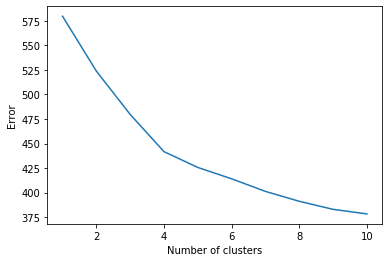

In [27]:
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_)

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

Μπορεί να είναι καλό clustering στην περίπτωση που έχουμε 4 κέντρα

Text(0, 0.5, 'silhouette score')

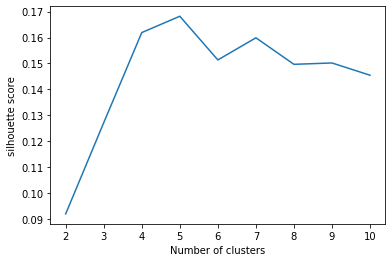

In [28]:
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

Από το διάγραμμα του shilhouette score βλέπουμε πως η τιμή του μεγιστοποιείται για αριθμό από clusters ίσο με 5.
Από το διάγραμμα του inertia-error ότι για αριθμό κέντρων μεγαλύτερο του 4, το σφάλμα πέφτει πολύ.
Συνδοιάζοντας την πληροφορία από τα 2 διαγράμματα θα έλεγε κανείς πως μια καλή τιμή για clustering ίσως να ήταν το 5.

In [29]:
k=5
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(X)

array([0, 0, 3, 1, 0, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 4, 0, 0, 2, 0, 0, 1,
       3, 4, 3, 3, 1, 4, 1, 0, 4, 1, 3, 1, 0, 3, 3, 1, 0, 1, 1, 1, 3, 4,
       0, 3, 3, 1, 0, 0, 1, 1, 4, 0, 1, 1, 0, 1, 1, 4, 2, 1, 1, 1, 4, 0,
       0, 1, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 1, 0, 1, 1, 4, 0, 1, 0, 4, 0, 1, 1,
       1, 1, 1, 4, 1, 3, 0, 3, 3, 1, 4, 1, 1, 0, 2, 0, 3, 0, 1, 3, 0, 1,
       1, 0, 1, 1, 3, 1, 1, 4, 4, 1, 0, 0, 3, 1, 0, 0, 0, 0, 4, 0, 0, 1,
       0, 4, 0, 0, 0, 1, 4, 4, 0, 0, 0, 0, 3, 0, 1, 4, 0, 1, 1, 3, 1, 0,
       0, 0, 4, 4, 1, 1, 0, 1, 0, 3, 3, 1, 3, 1, 1, 4, 1, 1, 3, 4, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 3,
       1, 1, 1, 0, 3, 3, 0, 1, 3, 3, 0, 4, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 3, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0,
       4, 4, 1, 0, 1, 1, 3, 1, 3, 2, 1, 2, 0, 1, 4, 1, 2, 1, 1, 1, 4, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1,

In [30]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 food
 bar
 place
 good
 drinks
 great
 beer
 menu
 night
 like
Cluster 1:
 store
 like
 place
 service
 time
 just
 great
 staff
 good
 customer
Cluster 2:
 dress
 dresses
 wedding
 store
 appointment
 experience
 like
 time
 service
 try
Cluster 3:
 hair
 cut
 haircut
 salon
 barber
 stylist
 great
 time
 appointment
 place
Cluster 4:
 nails
 nail
 shellac
 manicure
 pedicure
 polish
 salon
 mani
 pedi
 place


In [31]:
mapped_kmeans_labels,C = cluster_class_mapping(kmeans.labels_,true_labels)
print(C)
scores(true_labels,mapped_kmeans_labels)

[[246   3  76]
 [  7 241   1]
 [  8   1 166]]
[0.75692308 0.96787149 0.94857143]
[0.94252874 0.98367347 0.68312757]
0.8881018615166957
0.8718291054739653


In [32]:
print(kmeans.cluster_centers_)

[[0.00422616 0.02289625 0.00234537 ... 0.00436537 0.00637513 0.0088938 ]
 [0.00512547 0.01895462 0.01187435 ... 0.00729451 0.00762347 0.00088287]
 [0.00463382 0.00874662 0.01061631 ... 0.00753558 0.0051455  0.        ]
 [0.00448594 0.01648837 0.00685435 ... 0.0102945  0.00576658 0.00043383]
 [0.00776152 0.02127455 0.00650036 ... 0.00678726 0.00377151 0.0005602 ]]


In [33]:
center_distances(kmeans)
print(kmeans.inertia_)
#print(distances_array[0,3])
#print(distances_array[2,4])

[0.57350592 1.0245444  0.87814952 0.94295895 0.86936096 0.7415386
 0.81650118 1.11422253 1.16968144 0.99011723]
[[0.         0.57350592 1.0245444  0.87814952 0.94295895]
 [0.57350592 0.         0.86936096 0.7415386  0.81650118]
 [1.0245444  0.86936096 0.         1.11422253 1.16968144]
 [0.87814952 0.7415386  1.11422253 0.         0.99011723]
 [0.94295895 0.81650118 1.16968144 0.99011723 0.        ]]
430.2666275390669


Έχοντας τρέξει το πείραμα (2) φαίνεται πως τα clusters που αφορούσαν τις κατηγορίες bar και beaty & Spa έχουν σπάσει σε δύο cluster η κάθε κατηγορία αντίστοιχα. Γεγονός είναι ότι βάση των δεδομένων που πήραμε από τις δύο μετρικές inertia και shilhouette score αυτός είναι και ο ιδανικός αριθμός για cluster για τα δεδομένα αυτά. Αυτό μπορεί να σημαίνει ότι λάθος προσπαθούμε να αντισοιχίσουμε τα δεδομένα αυτά σε τρείς μόνο ομάδες. Πιο συγκεκριμένα αν πάρεις μια επιχείρηση που ξέρουμε ότι ανοίκει στην κατηγορία bars ανήκει και σε άλλες κατηγορίες, οπότε θα υπάρχουν επιχειρήσεις της κατηγορίας bars από τα δεδομένα μας οι οποίες θα μοιάζουν πιο πολύ με άλλες επιχειρήσεις που ανήκουν στην κατηγορία bar και άλλες που θα μοιάζουν λιγότερο, και αυτή η διαφοροποίηση προκύπτει από τις επιπλέον κατηγορίες που ανήκει κάθε επιχείρηση. 
* Υποσημείωση : μπορεί ένα agglomerative clustering(treegram) να εμφανίσει αυτή την διαφοροποίηση που περιγράφω παραπάνω
* Υποσημείωση 2 : η μετρική shilhouette score είναι μια ισχυρή ένδειξη ότι τα 5 κέντρα είναι κέντρα είναι μια πολύ καλή επιλογή ως προς των διαχορισμό των δεδομένων σε ομάδες που απέχουν αρκετά μεταξύ τους.
* Υποσημείωση 3 : αν κοιτάξουμε τα top-terms από τα δύο cluster που αφορούν την κατηγορία bars θα δεί κανείς πως στο ένα από τα δύο cluster εμφανίζεται μέσα στα top-terms του η λέξη food ενώ στο άλλο όχι, αυτό μπορούμε να πούμε ότι είναι μια ένδειξη πως το cluster που φέρει στα top-terms τη λέξη food χαρακτηρίζεται και από μια επιπλέον κατηγορία αυτή της εστίασης. Αντίστοιχα τα cluster beaty & spa το ένα φαίνεται να φέρει χαρακτηριστηκά στα top-terms επιχειρήσεις που ασχολούνται περισσότερο με την κατηγορία nails manicure κλπ ενώ το άλλο φαίνεται να φέρει χαρακτηριστικά στα top-terms επιχειρήσεις που ασχολούνται περισσότερο με την κατηγορία hairstyling grooming κλπ. 
Συμπερασματικά το clustering που κάνει ο k-means για 5 κέντρα δεν είναι κακό. Λάθος είναι οι κατηγορίες που διαλέξαμε εμείς.